# <font color=#023F7C> **Data cleaning and exploration** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >



**<font size='4'><u>Goal of this practical session</u>**</font> <br>

You've been provided a `athlete_events.csv` dataset containing **historical data on the modern Olympic Games**, including all the Games from Athens 1896 to Rio 2016. The dataset contains 15 column and each row corresponds to an individual athlete competing in an individual Olympic event.

The goal of this practical session is to get to know this large dataset and clean it from missing values and inconsistencies. <br>
Don't forget to **save the cleaned dataset** at the end of the session, since it will be used for the Data Visualization practical session.

**<font size='4'><u>What is Data cleaning ?</u>**</font> <br>

Data cleaning is a crucial step in the data analysis and machine learning process, as the quality of the insights and models generated heavily relies on the accuracy and reliability of the underlying data. Raw data often contains **errors**, **inconsistencies**, **missing values**, and **outliers** that can distort results or lead to faulty conclusions. Data cleaning involves identifying and rectifying these issues, ensuring the dataset is trustworthy and suitable for analysis.


**<font size='4'><u>Before you start to working on this notebook ⚠️</u>**</font> <br>

Please download/copy this notebook from `hfactory_magic_folders\course` and drop it into your own directory `my_work` on HFactory. <br>
If you don't, you won't be able to save the modifications you've made on this notebook.

**<font size='4'><u>Need help ?</u>**</font> <br>

If you struggling with this notebook, you can go to the **Beginner and Intermediate python notebooks** for guidance. <br>
Don't hesitate to also ask help from the bootcamp's team/speakers.

## **1. Import libraries and dataset**
First, let's import Python libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
pd.set_option('display.max_columns', None) #Show all columns

Then, let's import the dataset using the pandas `pd.read_csv()` function. <br>

In [2]:
# Path to the dataset in HFactory
path=r'data/athlete_events.csv'

#Import the csv file
df = pd.read_csv(path,encoding='latin-1')

## **2. Data discovery**

**Question 1**: <br>
**Display the dataset's head and tail.**

**Question 2**: <br> **Use the pandas function `.info()` to get general information on the dataset.**<br>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


**What can you say about the loaded dataset ?** Empty values


**Question 3**:  <br> **Print all the columns/variables of the dataset.**

In [26]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,None
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",None
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",None
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,None


## **3. Analyze the dataframe's dtypes**
**Question 4**: <br>
**Create 3 lists, each containing columns names with an int, float and object type.**
- List 1: Columns with an `int64` type
- List 2: Columns with a `float64` type
- List 3: Columns with an `object` type.

*Note: You can use pandas' `.select_dtypes()` function to get columns with a specific dtype.* <br>
*Create a list from a Pandas Dataframe/series with `.to_list()`*

In [8]:
int_columns = df.select_dtypes(include=int).columns.to_list()
float_columns = df.select_dtypes(include=float).columns.to_list()
object_columns = df.select_dtypes(include='object').columns.to_list()

**Question 5**: <br>
**Compute the number of unique values for the columns with an object and int type.** <br>

*Note: Combine the list with int columns and object columns using the `+` operator*. <br>
*Create a dataframe with the number of unique values and the corresponding variable.*

In [8]:
uniques = df.select_dtypes(include=['object', int]).nunique()
uniques

ID        135571
Name      134732
Sex            2
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

**Which column/variable has over 15 unique values ?**

In [12]:
list(uniques[uniques >= 15].index)

['ID', 'Name', 'Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event']

**Question 6**: <br>
**Compute the summary statistics of columns with a float type, with pandas' `.describe()` function.** <br>

In [13]:
df.select_dtypes(include='float').describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


**Do you detect outliers (weird/abnormal values) in the data ?**

Max values are a bit off for "Age" and "Weight"

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

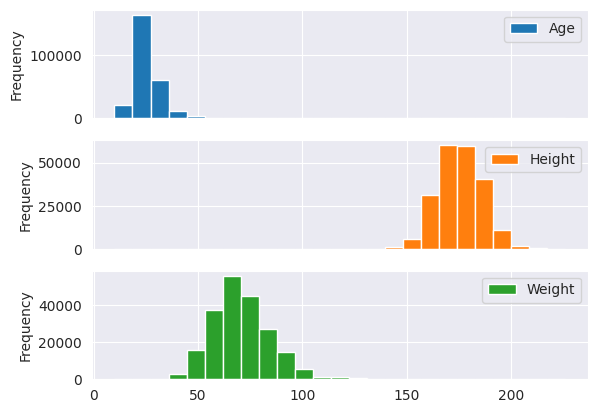

In [18]:
df.select_dtypes(include='float').plot(kind='hist', bins=25, subplots=True)

Now the values are more explainable: these variables tend to follow a normalized distribution

## **4. Analyze missing values**

**Question 7**: <br> **Compute the number of NaN value for every variable/column** <br>

*Note: A NaN value represents a missing value in a cell of the dataframe* <br>
*You can use the `.isna()` function.*

**Which variables of the dataset has missing values ?**

In [21]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**Question 8 :  <br>
What can you say about None Value? Do they all mean the same thing? Should we delete all the missing Values? <br>**

In [22]:
df["Medal"].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

- None values for Medals indicate that the athlete didn't receive any medal at all, which is still an important metric
- Missing numeric values should be replaced by the mean of all available values

**Question 9: <br>
Fill the NaN line of the column `Medal` with the string `None`.**

In [9]:
df["Medal"] = df["Medal"].fillna("None")

**Question 10:** <br>
**Drop the columns of the dataset that have missing values with `.dropna(axis=1)`. <br>**
Don't forget to add `.reset_index(drop=True)` after dropping the NaN values in the dataframe !

In [18]:
na_proportions = df.select_dtypes(include=[int, float]).isna().sum() / len(df)
to_replace = na_proportions[na_proportions <= 0.1].index.to_list()
to_drop = na_proportions[na_proportions > 0.1].index.to_list()

In [16]:
df.dropna(subset=to_drop, inplace=True).reset_index(drop=True)  # Don't forget to reset the index if the data were to be reused in the same variable

In [23]:
to_replace

['ID', 'Age', 'Height', 'Weight', 'Year']

In [24]:
for col in to_replace:
  df[col] = df[col].fillna(df[col].mean())

**If you don't want to drop rows, you can replace the missing values in each variable** <br>
Try the following methods only if the variable has a small number of NaN values (less than 10%).
- Replace with the mean or median value for continuous variables (mostly columns with a float dtype)
- Replace with the variable's most frequent value (`.mode()`) or by creating a new category for categorical variables (mostly columns with an int/object dtype)

You can drop the variables with a high number of missing values.

At this step, the dataset shouldn't have any missing values (you can check with `.isna().sum().sum()`)


In [25]:
df.isna().sum().sum()

0

**Question 11**: <br>
**Save the cleaned dataframe as a csv file called `dataset_train_clean.csv` using pandas' `.to_csv()` function.** <br>
*Note: Make sure to add `index=False` to the `.to_csv()` function or else the index of the dataframe will be saved too.*

In [27]:
df.to_csv('data/athlete_events_cleaned.csv', index=False)